# SNID Results

In [1]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.insert(0, '../scripts')
from run_snid_typing import sdss_data_iter

results_dir = Path('.').resolve().parent / 'results'


   DEBUG (2020-05-18 14:18:10,044): urllib3.connectionpool - Starting new HTTPS connection (1): portal.nersc.gov:443
   DEBUG (2020-05-18 14:18:10,418): urllib3.connectionpool - https://portal.nersc.gov:443 "GET /project/dessn/SDSS/dataRelease/ HTTP/1.1" 200 2024
   DEBUG (2020-05-18 14:18:10,427): urllib3.connectionpool - Starting new HTTP connection (1): www.ioa.s.u-tokyo.ac.jp:80
   DEBUG (2020-05-18 14:18:10,798): urllib3.connectionpool - http://www.ioa.s.u-tokyo.ac.jp:80 "GET /~doi/sdss/ HTTP/1.1" 404 208


## SN Typing


In [2]:
def read_peak_types(path, perc_cutoff=0):
    """Read the top SNID classifications for each objects
    
    Args:
        path (Path): File path to read from
        perc_cutoff (float): Drop values with ``perctemp`` < this value
    """

    types = pd.read_csv(path)
    
    # Create a dummy value that allows us to sort measurements by how close 
    # they are to peak phase in asc
    types['psuedo_phase'] = 100 - types.phase.abs()
    
    # Sort classifications by number of template matches for each class    
    types.sort_values(['ntemp', 'psuedo_phase'], ascending=False, inplace=True)
    
    # Keep only the top classifications for each object
    types.drop_duplicates(keep='first', subset='obj_id', inplace=True)

    # Drop results that don't make the cut
    types = types[types.perctemp >= perc_cutoff]
    
    return types.set_index('obj_id')


We consider results with a minimum rlap of 10 and 5. We also consider the combination of the results.

In [3]:
rlap_10_path = results_dir / 'snid' / 'type_rlap_10' / 'all.csv'
rlap_10 = read_peak_types(rlap_10_path)
rlap_10.type.value_counts()


FileNotFoundError: [Errno 2] File b'/Users/daniel/Github/Photometric-Classification/results/snid/type_rlap_10/all.csv' does not exist: b'/Users/daniel/Github/Photometric-Classification/results/snid/type_rlap_10/all.csv'

In [4]:
rlap_5_path = results_dir / 'snid' / 'type_rlap_5' / 'all.csv'
rlap_5 = read_peak_types(rlap_5_path)
rlap_5.type.value_counts()


FileNotFoundError: [Errno 2] File b'/Users/daniel/Github/Photometric-Classification/results/snid/type_rlap_5/all.csv' does not exist: b'/Users/daniel/Github/Photometric-Classification/results/snid/type_rlap_5/all.csv'

In [5]:
combined_data = rlap_5.copy()
combined_data.update(rlap_10)
combined_data.type.value_counts()


NameError: name 'rlap_5' is not defined

In [57]:
def plot_snid_template_num(data):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))

    for classification, class_data in data.groupby('type'):
        ax1.hist(class_data.ntemp, label=classification, bins=np.arange(0, 100, 5))
        ax1.set_xlabel('Number of Templates')

        ax2.hist(class_data.perctemp, label=classification, bins=np.arange(.5, 1.1, .1))
        ax2.set_xlabel('Percentage of Templates')

        ax3.scatter(class_data.ntemp, class_data.perctemp, label=classification, s=10)
        ax3.set_xlabel('Number of Templates')
        ax3.set_ylabel('Percentage of Templates')

    ax3.legend()    
    plt.tight_layout()



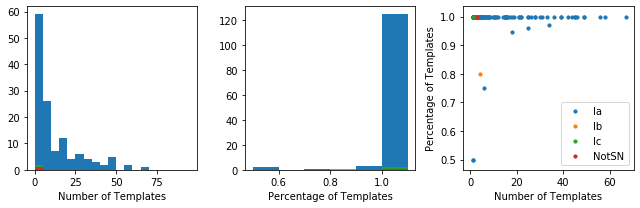

In [58]:
plot_snid_template_num(rlap_10)


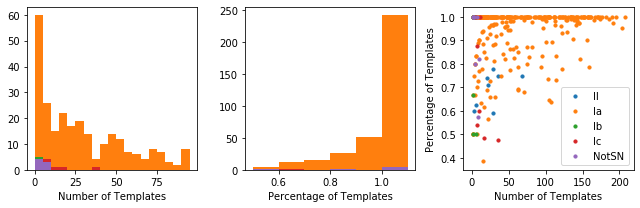

In [59]:
plot_snid_template_num(rlap_5)


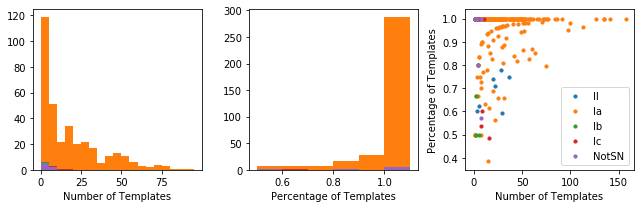

In [60]:
plot_snid_template_num(combined_data)


## SN Sub-Typing


In [68]:
def read_peak_subtypes(path, perc_cutoff=0):
    """Read the top SNID classifications for each objects
    
    Args:
        path (Path): File path to read from
        perc_cutoff (float): Drop values with ``perctemp`` < this value
    """

    types = pd.read_csv(path)
    
    # Create a dummy value that allows us to sort measurements by how close 
    # they are to peak phase in asc
    types['psuedo_phase'] = 100 - types.phase.abs()
    
    # Sort classifications by number of template matches for each class    
    types.sort_values(['ntemp', 'psuedo_phase'], ascending=False, inplace=True)
    
    types = types[~np.isin(types.type, ['Ia', 'Ib', 'Ic', 'II', 'NotSN'])]
    # Keep only the top classifications for each object
    types.drop_duplicates(keep='first', subset='obj_id', inplace=True)

    # Drop results that don't make the cut
    types = types[types.perctemp >= perc_cutoff]
    
    return types.set_index('obj_id')


In [69]:
read_peak_subtypes(rlap_5_path)

,type,ntemp,perctemp,phase,minwave,maxwave
obj_id,,,,,,
10550,Ia,122,0.931298,9.4,3999.543945,8999.68457
10550,Ib,6,0.045802,9.4,3999.543945,8999.68457
10550,Ic,3,0.022901,9.4,3999.543945,8999.68457
10550,II,0,0.000000,9.4,3999.543945,8999.68457
10550,NotSN,0,0.000000,9.4,3999.543945,8999.68457
...,...,...,...,...,...,...
16072,Ia,5,0.833333,8.0,4275.000000,10000.00000
16072,Ib,0,0.000000,8.0,4275.000000,10000.00000
16072,Ic,0,0.000000,8.0,4275.000000,10000.00000
